<a href="https://colab.research.google.com/github/kyle1213/2022S-ML/blob/main/HW3_201920723_%EA%B9%80%EB%8F%99%EC%9A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
path = './drive/MyDrive/Colab Notebooks/heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [5]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



[0.5492957746478874, 0.5352112676056338, 0.5633802816901409, 0.4788732394366197, 0.6056338028169014, 0.5211267605633803] 4
test acc = 
0.704225352112676


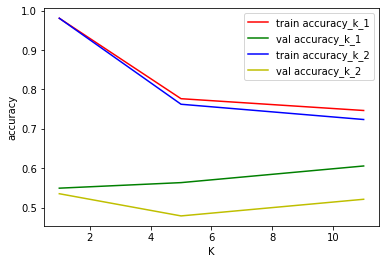

In [7]:
### 문제 1 ###
## 코드 작성 ##
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
classifier1_1 = KNeighborsClassifier(n_neighbors=1, metric="manhattan")         # #_1은 manhattan metric, #_2는 euclidean metric을 사용하고, 1_#은 k=1, 2_#은 k=5, 3_#은 k=11를 사용하였다
classifier1_1.fit(X_train, y_train)

classifier1_2 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
classifier1_2.fit(X_train, y_train)

classifier2_1 = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
classifier2_1.fit(X_train, y_train)

classifier2_2 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier2_2.fit(X_train, y_train)

classifier3_1 = KNeighborsClassifier(n_neighbors=11, metric="manhattan")
classifier3_1.fit(X_train, y_train)

classifier3_2 = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
classifier3_2.fit(X_train, y_train)

predict1_1_train = classifier1_1.score(X_train, y_train)
predict1_2_train = classifier1_2.score(X_train, y_train)
predict2_1_train = classifier2_1.score(X_train, y_train)
predict2_2_train = classifier2_2.score(X_train, y_train)
predict3_1_train = classifier3_1.score(X_train, y_train)
predict3_2_train = classifier3_2.score(X_train, y_train)

predict1_1 = classifier1_1.score(X_val, y_val)
predict1_2 = classifier1_2.score(X_val, y_val)
predict2_1 = classifier2_1.score(X_val, y_val)
predict2_2 = classifier2_2.score(X_val, y_val)
predict3_1 = classifier3_1.score(X_val, y_val)
predict3_2 = classifier3_2.score(X_val, y_val)

K = [1, 5, 11]
predict_k_1_train = [predict1_1_train, predict2_1_train, predict3_1_train]
predict_k_1 = [predict1_1, predict2_1, predict3_1]

predict_k_2_train = [predict1_2_train, predict2_2_train, predict3_2_train]
predict_k_2 = [predict1_2, predict2_2, predict3_2]

plt.figure()
plt.plot(K, predict_k_1_train, label='train accuracy_k_1', color='r')
plt.plot(K, predict_k_1, label='val accuracy_k_1', color='g')
plt.plot(K, predict_k_2_train, label='train accuracy_k_2', color='b')
plt.plot(K, predict_k_2, label='val accuracy_k_2', color='y')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()

score_list = [predict1_1, predict1_2, predict2_1, predict2_2, predict3_1, predict3_2]
score_list_name = ['classifier1_1', 'classifier1_2', 'classifier2_1', 'classifier2_2', 'classifier3_1', 'classifier3_2']
i = score_list.index(max(score_list))
print(score_list, score_list.index(max(score_list)))

new_X_train = pd.concat([X_train, X_val], ignore_index=True)
new_y_train = pd.concat([y_train, y_val], ignore_index=True)

str = score_list_name[i] + '.fit(new_X_train, new_y_train)'
exec(str)

str = score_list_name[i] + '.score(X_test, y_test)'
exec("a = " + str)
print("test acc = ")
print(a)



**설명 작성**  
- 최적의 파라미터: 현재 런타임 상으로는 k=11, metric=manhattan
- 설명: k=1, 5, 11과 metric=manhatton, euuclidean마다 train과 val의 acc을 구하고 그 중 val의 acc이 가장 높은 값을 가지게 하는 파라미터를 구하고, train과 val을 사용하여 다시 fit을 한 뒤 test를 사용하였다.
이 글을 작성시의 런타임에서는 k=11, metric=manhattan 방식일 때 val의 acc가 약 60.5%로 가장 높았고 그때의 test acc는 0.7042..이 나왔다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


[0.49295774647887325, 0.49295774647887325, 0.5070422535211268, 0.6056338028169014, 0.7605633802816901, 0.8309859154929577] 5
test acc = 
0.7323943661971831


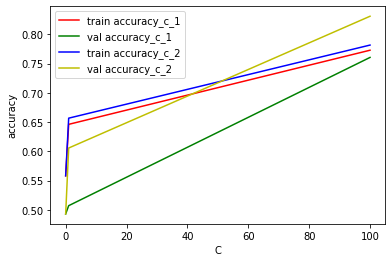

In [8]:
### 문제 2 ###
## 코드 작성 ##
import matplotlib.pyplot as plt
from sklearn import svm
classifier1_1 = svm.SVC(kernel='rbf', C=0.01)        # #_1은 rbf, #_2는 poly를 사용하고, 1_#은 C=0.01(소프트마진), 2_#은 C=1, 3_#은 C=100(하드마진)를 사용하였다
classifier1_1.fit(X_train, y_train)

classifier1_2 = svm.SVC(kernel='poly', C=0.01) 
classifier1_2.fit(X_train, y_train)

classifier2_1 = svm.SVC(kernel='rbf', C=1) 
classifier2_1.fit(X_train, y_train)

classifier2_2 = svm.SVC(kernel='poly', C=1) 
classifier2_2.fit(X_train, y_train)

classifier3_1 = svm.SVC(kernel='rbf', C=100) 
classifier3_1.fit(X_train, y_train)

classifier3_2 = svm.SVC(kernel='poly', C=100) 
classifier3_2.fit(X_train, y_train)

predict1_1_train = classifier1_1.score(X_train, y_train)
predict1_2_train = classifier1_2.score(X_train, y_train)
predict2_1_train = classifier2_1.score(X_train, y_train)
predict2_2_train = classifier2_2.score(X_train, y_train)
predict3_1_train = classifier3_1.score(X_train, y_train)
predict3_2_train = classifier3_2.score(X_train, y_train)

predict1_1 = classifier1_1.score(X_val, y_val)
predict1_2 = classifier1_2.score(X_val, y_val)
predict2_1 = classifier2_1.score(X_val, y_val)
predict2_2 = classifier2_2.score(X_val, y_val)
predict3_1 = classifier3_1.score(X_val, y_val)
predict3_2 = classifier3_2.score(X_val, y_val)

C = [0.01, 1, 100]
predict_c_1_train = [predict1_1_train, predict2_1_train, predict3_1_train]
predict_c_1 = [predict1_1, predict2_1, predict3_1]

predict_c_2_train = [predict1_2_train, predict2_2_train, predict3_2_train]
predict_c_2 = [predict1_2, predict2_2, predict3_2]

plt.figure()
plt.plot(C, predict_c_1_train, label='train accuracy_c_1', color='r')
plt.plot(C, predict_c_1, label='val accuracy_c_1', color='g')
plt.plot(C, predict_c_2_train, label='train accuracy_c_2', color='b')
plt.plot(C, predict_c_2, label='val accuracy_c_2', color='y')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

score_list = [predict1_1, predict1_2, predict2_1, predict2_2, predict3_1, predict3_2]
score_list_name = ['classifier1_1', 'classifier1_2', 'classifier2_1', 'classifier2_2', 'classifier3_1', 'classifier3_2']
i = score_list.index(max(score_list))
print(score_list, score_list.index(max(score_list)))

str = score_list_name[i] + '.fit(new_X_train, new_y_train)'
exec(str)

str = score_list_name[i] + '.score(X_test, y_test)'
exec("a = " + str)
print("test acc = ")
print(a)



**설명 작성**  
- 최적의 파라미터:현재 런타임에서 C=100, kernel=poly
- 설명:하이퍼 파라미터 C에 대한 값으로는 0.01, 1, 100 3가지 종류와, kernel의 종류로는 rbf, poly 2가지 종류 총 6가지 모델에 대해서 train과 val에 대해 모델을 테스트 해봤으며, val의 acc가 약 83%로 가장 높게 나온 모델인 c=100, kernel=poly인 모델을 최종 모델로 선정하였다. 최종 모델을 다시 train과 val에 대해 fit 한 후 test를 하였으며, 이 모델의 test acc는 약 73.2%가 나왔다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

[0.823474178403756, 0.8629107981220656, 0.8657276995305164] 2
test acc = 
0.676056338028169


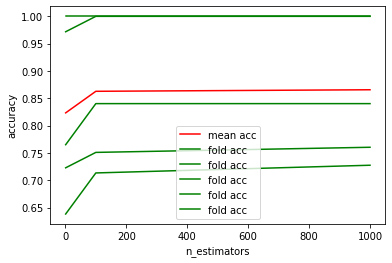

In [16]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])
#랜덤 포레스트의 하이퍼 파라미터로 n_estimator를 변화시켰으며, clf1은 1 estimator, clf2는 100 estimators, clf3는 1000 estimators이다

clf1 = RandomForestClassifier(n_estimators=1)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = RandomForestClassifier(n_estimators=1000)

clfs = [clf1, clf2, clf3]
scores = []
each_fold_scores = []
for i in clfs:
  each_fold_scores.append(cross_val_score(i, X_train, y_train, cv=KFold(5)))
  a = np.mean(cross_val_score(i, X_train, y_train, cv=KFold(5)))
  scores.append(a)

i = scores.index(max(scores))
print(scores, scores.index(max(scores)))
score_list_name = ['clf1', 'clf2', 'clf3']

str1 = score_list_name[i] + '.fit(X_train, y_train)'
str2 = score_list_name[i] + '.score(X_test, y_test)'
exec(str1)
exec("a = " + str2)
print("test acc = ")
print(a)

n = [1, 100, 1000]
plt.figure()
plt.plot(n, scores, label='mean acc', color='r')
plt.plot(n, [each_fold_scores[0][0], each_fold_scores[1][0], each_fold_scores[2][0]], label='fold acc', color='g')
plt.plot(n, [each_fold_scores[0][1], each_fold_scores[1][1], each_fold_scores[2][1]], label='fold acc', color='g')
plt.plot(n, [each_fold_scores[0][2], each_fold_scores[1][2], each_fold_scores[2][2]], label='fold acc', color='g')
plt.plot(n, [each_fold_scores[0][3], each_fold_scores[1][3], each_fold_scores[2][3]], label='fold acc', color='g')
plt.plot(n, [each_fold_scores[0][4], each_fold_scores[1][4], each_fold_scores[2][4]], label='fold acc', color='g')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()




**설명 작성**  
- test accuracy: 약 67.6%
- 최적의 파라미터: estimators의 수가 1000
- 설명: decision tree를 사용하는 random forest의 하이퍼 파라미터로 n_estimator 즉 트리의 수를 정하였는데, estimators의 수가 1, 100, 1000일 때의 값을 비교하였다. 이때 5 folds cv로 학습하고 각각의 val의 acc들의 평균이 가장 높은 estimators가 1000일 때의 모델을 최종 모델로 사용하였다. 이때 val의 평균 acc는 약 0.86가 나왔다.



[0.8394366197183099, 0.8647887323943662, 0.8647887323943662] 1
test acc = 
0.6619718309859155


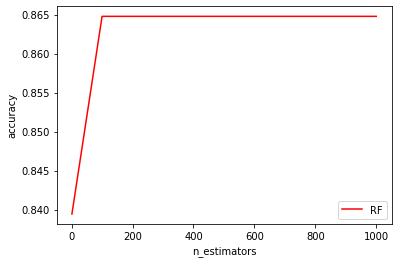

In [17]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
import numpy as np

clf1 = RandomForestClassifier(n_estimators=1)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = RandomForestClassifier(n_estimators=1000)

clfs = [clf1, clf2, clf3]
scores = []

for i in clfs:
  a = np.mean(cross_val_score(i, X_train, y_train, cv=LeaveOneOut()))
  scores.append(a)

i = scores.index(max(scores))
print(scores, scores.index(max(scores)))
score_list_name = ['clf1', 'clf2', 'clf3']

str1 = score_list_name[i] + '.fit(X_train, y_train)'
str2 = score_list_name[i] + '.score(X_test, y_test)'
exec(str1)
exec("a = " + str2)
print("test acc = ")
print(a)

n = [1, 100, 1000]
plt.figure()
plt.plot(n, scores, label='RF', color='r')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()




**설명 작성**  
- test accuracy:66.19%
- 최적의 파라미터:n_estimators=100
- 설명: decision tree를 사용하는 random forest의 하이퍼 파라미터로 n_estimator 즉 트리의 수를 정하였는데, estimators의 수가 1, 100, 1000일 때의 값을 비교하였다. 이때 LOOCV로 학습하고 각각의 val의 acc들의 평균이 가장 높은 estimators가 100일 때의 모델을 최종 모델로 사용하였다. 이때 val의 평균 acc는 약 0.8647가 나왔다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [19]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [20]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [21]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

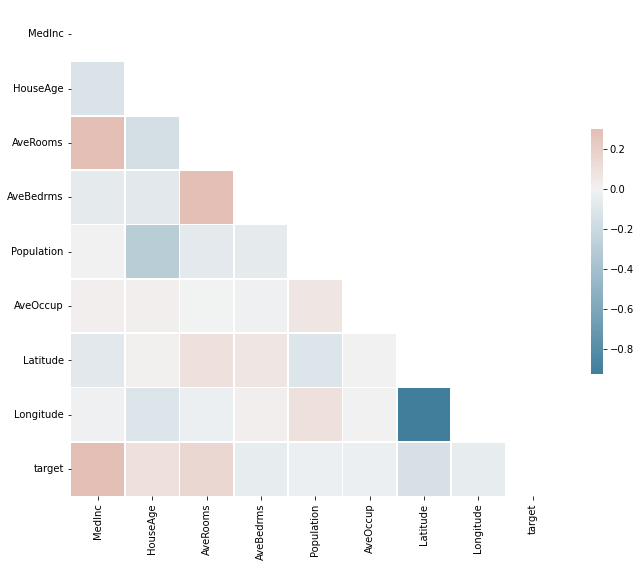

In [22]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import matplotlib.pyplot as plt
import seaborn as sns
# correlation matrix 계산하기
corr = df.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [23]:
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

- **Feature들 간 관계 서술**  
  답: target과 MedInc의 correlation heat map의 값이 가장 크게(붉게)나오며 두 feature의 상관관계가 가장 높음을 알 수 있다. 그다음으로 Ave Rooms, HouseAge가 순서대로 높은 양의 상관관계를 나타내며 Latitude가 음의 상관관계중 가장 높은 값을 나타내고 있다. 그 외의 AveBedrms, Population, AveOccup, Longtitude는 흰색 또는 푸른 히트맵이 나오며 낮은 상관관계를 보여주고 있다. 따라서 모델 데이터를 학습할 때 상관관계가 0이상으로 높은 MedInc, HouseAge, AveRooms, Latitude를 사용할 것이다.

- **최종 선택한 feature들**  
  답: MedInc, HouseAge, AveRooms, Latitude

In [24]:
### 문제 4-1 ###
# 새 dataframe 만들기 
X = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = df[['target']]

### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [25]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler() 
scaler.fit(X)
reg_X = scaler.transform(X)

X = pd.DataFrame(data=reg_X, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
clf = LinearRegression()
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
score_mse_train = mse(y_train, predict_train)
score_r2_train = r2(y_train, predict_train)

predict_test = clf.predict(X_test)
score_mse_test = mse(y_test, predict_test)
score_r2_test = r2(y_test, predict_test)
print("prediction of train // mse:", score_mse_train, "     r2:", score_r2_train, "\n")
print("prediction of test  // mse:", score_mse_test, "    r2", score_r2_test)

prediction of train // mse: 0.6403465449479042      r2: 0.5185239334541004 

prediction of test  // mse: 0.6420644416218261     r2 0.5225346583445658


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: target값이 0.14999~5.0이 나오며 평균이 2정도 되는 점에서 mse가 0.64정도 나오면 수치적으로 그닥 좋지도 나쁘지도 않은 보통의 성능을 내는것 같다. 또한 r2가 1에 가까우면 실제 추측값에 비슷하니까 잘하는 중, r2가 0에 가까우면 평균만큼 추측(찍는거)이니까 별로, r2가 음수면 아예틀리는 모델인데 0.52가 나온다는 것은 좋지도 나쁘지도 않은 보통의 성능을 내고있는 것 같다.(moderate하다) 또한 train에 비해 test가 너무 낮지 않아서 overfit이 아니며, moderate한 성능인 것 같다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [26]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, Lasso
alpha = [0.0001, 0.001,0.01,0.1, 1, 10]
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1)

rdg1 = Ridge(alpha = alpha[0])
rdg2 = Ridge(alpha = alpha[1])
rdg3 = Ridge(alpha = alpha[2])
rdg4 = Ridge(alpha = alpha[3])
rdg5 = Ridge(alpha = alpha[4])
rdg6 = Ridge(alpha = alpha[5])

lasso1 = Lasso(alpha=alpha[0])
lasso2 = Lasso(alpha=alpha[1])
lasso3 = Lasso(alpha=alpha[2])
lasso4 = Lasso(alpha=alpha[3])
lasso5 = Lasso(alpha=alpha[4])
lasso6 = Lasso(alpha=alpha[5])

rdg1.fit(X_train_, y_train_)
rdg2.fit(X_train_, y_train_)
rdg3.fit(X_train_, y_train_)
rdg4.fit(X_train_, y_train_)
rdg5.fit(X_train_, y_train_)
rdg6.fit(X_train_, y_train_)

lasso1.fit(X_train_, y_train_)
lasso2.fit(X_train_, y_train_)
lasso3.fit(X_train_, y_train_)
lasso4.fit(X_train_, y_train_)
lasso5.fit(X_train_, y_train_)
lasso6.fit(X_train_, y_train_)

rdg1_pred = rdg1.predict(X_val)
rdg2_pred = rdg2.predict(X_val)
rdg3_pred = rdg3.predict(X_val)
rdg4_pred = rdg4.predict(X_val)
rdg5_pred = rdg5.predict(X_val)
rdg6_pred = rdg5.predict(X_val)

lasso1_pred = lasso1.predict(X_val)
lasso2_pred = lasso2.predict(X_val)
lasso3_pred = lasso3.predict(X_val)
lasso4_pred = lasso4.predict(X_val)
lasso5_pred = lasso5.predict(X_val)
lasso6_pred = lasso5.predict(X_val)

rdg_scores = [r2(y_val, rdg1_pred), r2(y_val, rdg2_pred), r2(y_val, rdg3_pred), r2(y_val, rdg4_pred), r2(y_val, rdg5_pred), r2(y_val, rdg6_pred)]
lasso_scores = [r2(y_val, lasso1_pred), r2(y_val, lasso2_pred), r2(y_val, lasso3_pred), r2(y_val, lasso4_pred), r2(y_val, lasso5_pred), r2(y_val, lasso6_pred)]

i = rdg_scores.index(max(rdg_scores))
j = lasso_scores.index(max(lasso_scores))

print(rdg_scores, rdg_scores.index(max(rdg_scores)))
a = rdg_scores.index(max(rdg_scores))
print(lasso_scores, lasso_scores.index(max(lasso_scores)))
b = lasso_scores.index(max(lasso_scores))
rdg_list_name = ['rdg1', 'rdg2', 'rdg3', 'rdg4', 'rdg5']
lasso_list_name = ['lasso1', 'lasso2', 'lasso3', 'lasso4', 'lasso5']




[0.512676539396814, 0.5126765361628222, 0.512676503822753, 0.5126761804070987, 0.5126729447545006, 0.5126729447545006] 0
[0.5126739070721251, 0.5126487870692233, 0.5121536577201957, 0.49020109931929834, -0.002075732173829614, -0.002075732173829614] 0


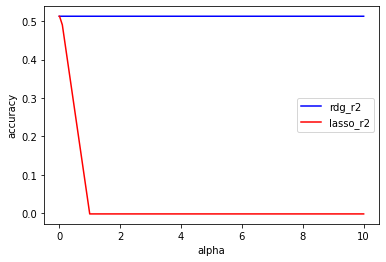

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##
plt.figure()
plt.plot(alpha, rdg_scores, label='rdg_r2', color='b')
plt.plot(alpha, lasso_scores, label='lasso_r2', color='r')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [27]:
### 문제 4-3 ###
# 최종 결과 출력
rdg = Ridge(alpha = alpha[a])
lasso = Lasso(alpha = alpha[b])

rdg.fit(X_train, y_train)
lasso.fit(X_train, y_train)

rdg_train_r2score = r2(y_train, rdg.predict(X_train))
lasso_train_r2score = r2(y_train, lasso.predict(X_train))
rdg_test_r2score = r2(y_test, rdg.predict(X_test))
lasso_test_r2score = r2(y_test, lasso.predict(X_test))



print("rdg_train_r2score=", rdg_train_r2score, "   lasso_train_r2score", lasso_train_r2score, "\n")
print("rdg_test_r2score=", rdg_test_r2score, "   lasso_test_r2score", lasso_test_r2score, "\n")




rdg_train_r2score= 0.5185239334541004    lasso_train_r2score 0.5185239001022891 

rdg_test_r2score= 0.5225346583557973    lasso_test_r2score 0.5225297501719427 

